In [64]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [65]:
pressure = pd.read_table('datas/PS2.txt', header=None)
flow = pd.read_table('datas/FS1.txt', header = None)
profile = pd.read_table('datas/profile.txt', header = None)
profile.columns = ['sample_id', 'valve_condition', 'whatever', 'raf', 'jsp']
pressure.columns = [f'pressure_{i}' for i in range(pressure.shape[1])]
flow.columns = [f'flow_{i}' for i in range(flow.shape[1])]
valve_condition = profile['valve_condition']
X = pd.concat([pressure, flow], axis=1)
y = valve_condition

In [66]:
n_train = 2000
X_train = X.iloc[:n_train]
X_test = X.iloc[n_train:]

y_train = y[:n_train]
y_test = y[n_train:]
model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("MSE :", mean_squared_error(y_test, y_pred))
print("R² :", r2_score(y_test, y_pred))


MSE : 0.036662047967049034
R² : 0.9996643598453696


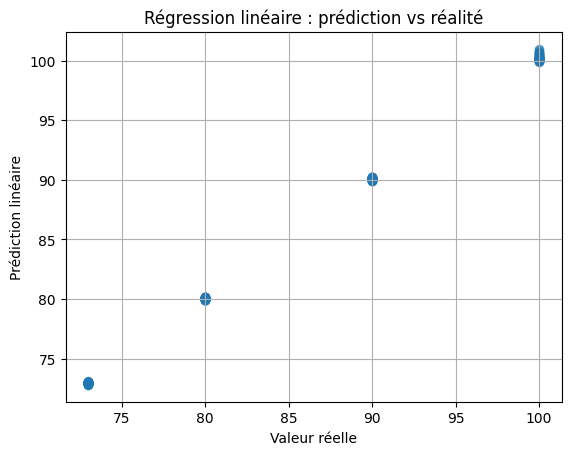

In [67]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Valeur réelle")
plt.ylabel("Prédiction linéaire")
plt.title("Régression linéaire : prédiction vs réalité")
plt.grid(True)
plt.show()

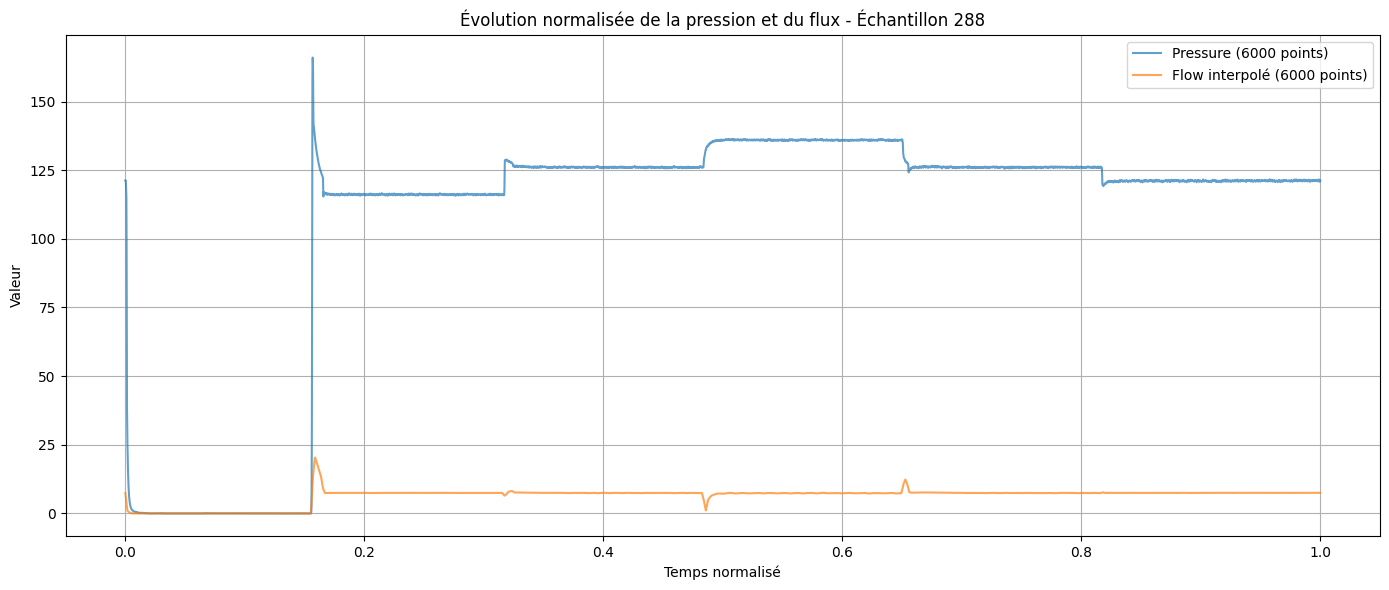

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Sélection d'un échantillon (ex : ligne 0)
# i = 255
i=288
pressure_sample = pressure.iloc[i].values
flow_sample = flow.iloc[i].values

# Créer un vecteur temps pour chaque série
t_pressure = np.linspace(0, 1, len(pressure_sample))  # 6000 points
t_flow = np.linspace(0, 1, len(flow_sample))          # 600 points

# Interpolation linéaire du flow pour qu'il ait aussi 6000 points
interpolator = interp1d(t_flow, flow_sample, kind='linear')
flow_sample_interp = interpolator(t_pressure)

# Tracé
plt.figure(figsize=(14, 6))
plt.plot(t_pressure, pressure_sample, label='Pressure (6000 points)', alpha=0.7)
plt.plot(t_pressure, flow_sample_interp, label='Flow interpolé (6000 points)', alpha=0.7)
plt.xlabel("Temps normalisé")
plt.ylabel("Valeur")
plt.title(f"Évolution normalisée de la pression et du flux - Échantillon {i}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
